In [ ]:
!pip install opendatasets

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import os
import datetime

from tensorflow.keras.utils import plot_model

import pydotplus, pydot
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.layers import (Conv2D, BatchNormalization, Activation, MaxPooling2D, GlobalAveragePooling2D, Dense, Flatten, Dropout)
from tensorflow.keras.optimizers import RMSprop, Adam, SGD
from keras import regularizers
from keras.callbacks import CSVLogger, ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Dropout, Reshape, Concatenate, LeakyReLU
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model
import opendatasets as od

In [ ]:
ds_url = "https://www.kaggle.com/datasets/xhlulu/140k-real-and-fake-faces"

In [ ]:
od.download(ds_url)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: krdipesh199
Your Kaggle Key: ··········


100%|██████████| 3.75G/3.75G [00:51<00:00, 78.2MB/s]


In [ ]:
path = '/content/140k-real-and-fake-faces/real_vs_fake/real-vs-fake'
def plot_image(path, set_):
    new_path = os.path.join(path, 'train', set_)
    fig, ax = plt.subplots(5,5, figsize=(20,10))
    fig.suptitle(set_ + 'Faces')
    k = 0
    for j in range(0,5,1):
        for i in range(0,5,1):
            img = load_img(os.path.join(new_path, os.listdir(os.path.join(new_path))[k]))
            ax[i,j].imshow(img)
            ax[i,j].set_title("")
            ax[i,j].axis('off')
            k +=1
  #  fig.tight_layout()
    plt.suptitle(set_ + ' Faces')
    return plt

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

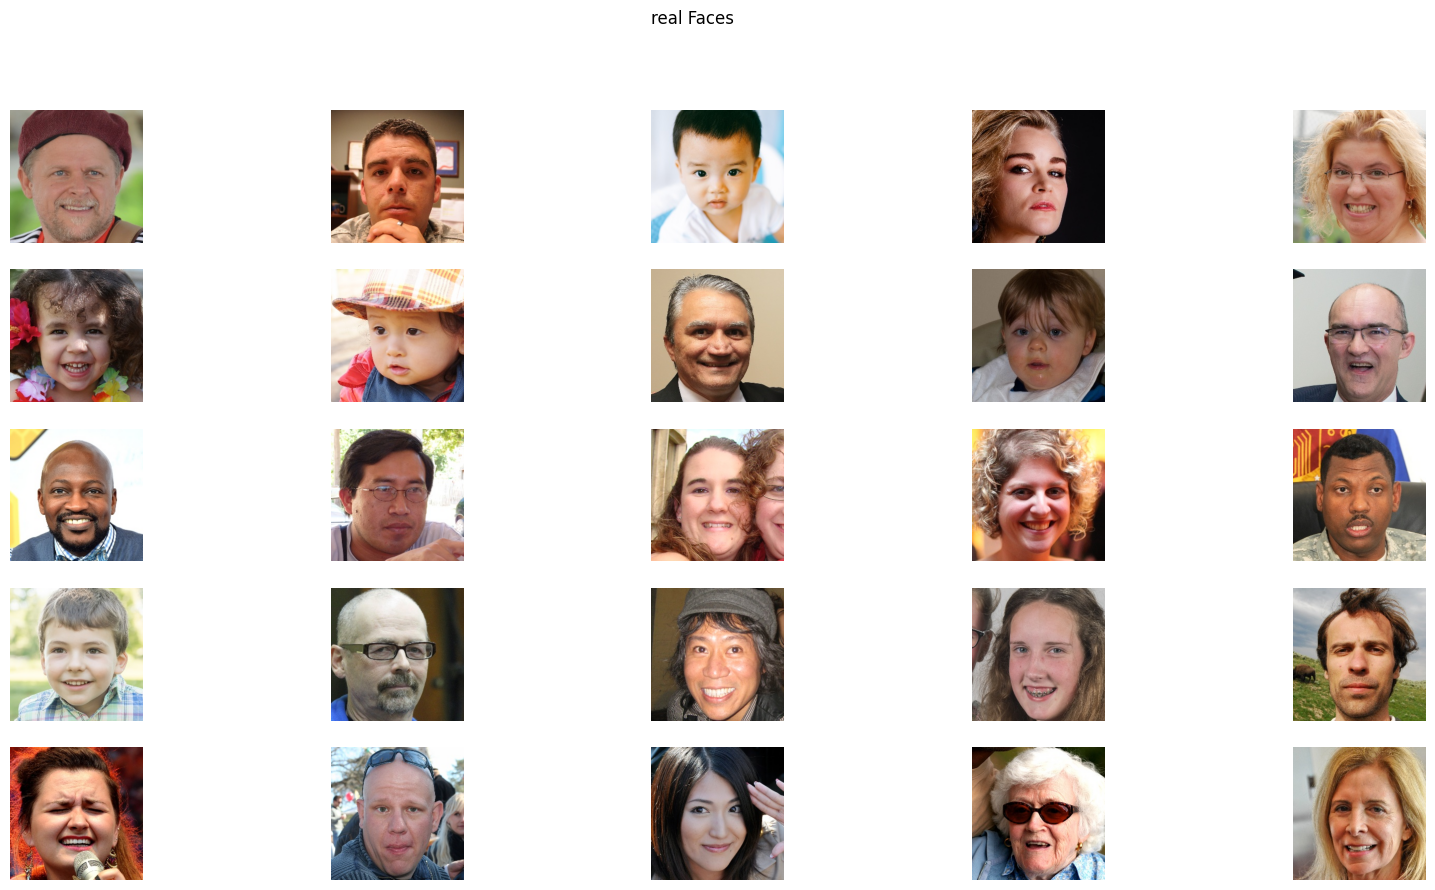

In [ ]:
plot_image(path,'real')

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

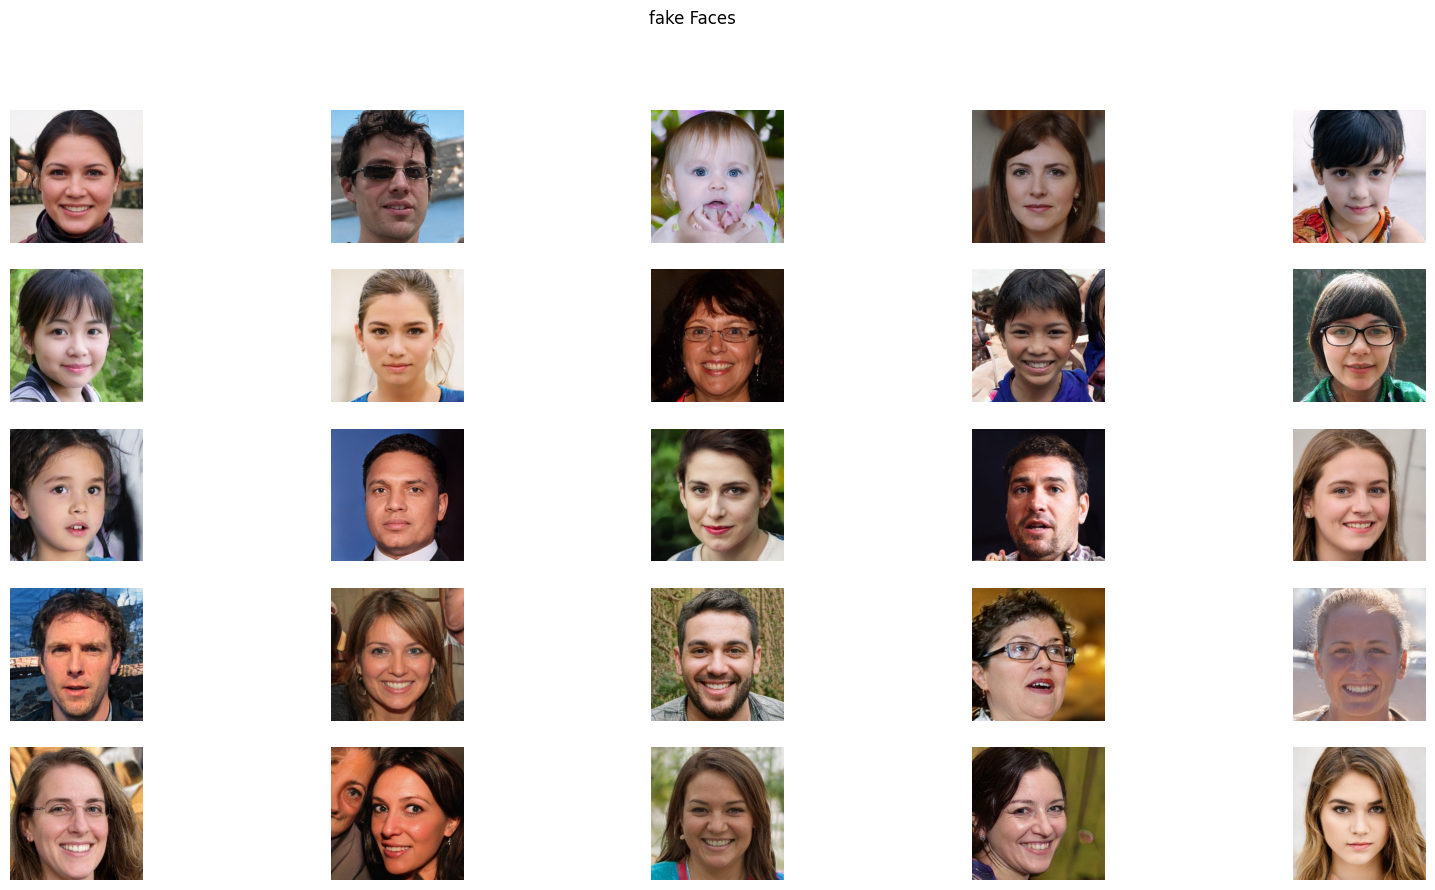

In [ ]:
plot_image(path,'fake')

In [ ]:
bs = 64
row, col = 128, 128
train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True
                                  )
training_set = train_datagen.flow_from_directory(path + '/train',
                                                 class_mode='binary',
                                                 shuffle=True,
                                                 target_size=(row,col),
                                                 batch_size=bs
                                                )
val_test_datagen = ImageDataGenerator(rescale=1./255)

validation_set = val_test_datagen.flow_from_directory(path + '/valid',
                                                      class_mode='binary',
                                                      shuffle=True,
                                                      target_size=(row,col),
                                                      batch_size=bs
                                                     )
test_set = val_test_datagen.flow_from_directory(path + '/test',
                                                class_mode='binary',
                                                shuffle=True,
                                                target_size=(row,col),
                                                batch_size=bs
                                               )
training_set.class_indices

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


{'fake': 0, 'real': 1}

In [ ]:
bs = 64
row, col = 128, 128
train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   featurewise_center=True,
                                   featurewise_std_normalization=True,
                                   rotation_range=30,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                  )
training_set = train_datagen.flow_from_directory(path + '/train',
                                                 class_mode='binary',
                                                 shuffle=True,
                                                 target_size=(row,col),
                                                 batch_size=bs
                                                )
val_test_datagen = ImageDataGenerator(rescale=1./255)

validation_set = val_test_datagen.flow_from_directory(path + '/valid',
                                                      class_mode='binary',
                                                      shuffle=True,
                                                      target_size=(row,col),
                                                      batch_size=bs
                                                     )
test_set = val_test_datagen.flow_from_directory(path + '/test',
                                                class_mode='binary',
                                                shuffle=True,
                                                target_size=(row,col),
                                                batch_size=bs
                                               )
training_set.class_indices

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


{'fake': 0, 'real': 1}

In [ ]:
model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape = (128, 128, 3)),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Flatten(),

     tf.keras.layers.Dense(512, activation='relu'),
     tf.keras.layers.Dropout(0.5),

    #  tf.keras.layers.Dropout(0.3),
     tf.keras.layers.Dense(2, activation='softmax')
     ]
)

In [ ]:
tf.keras.utils.pydot = pydot


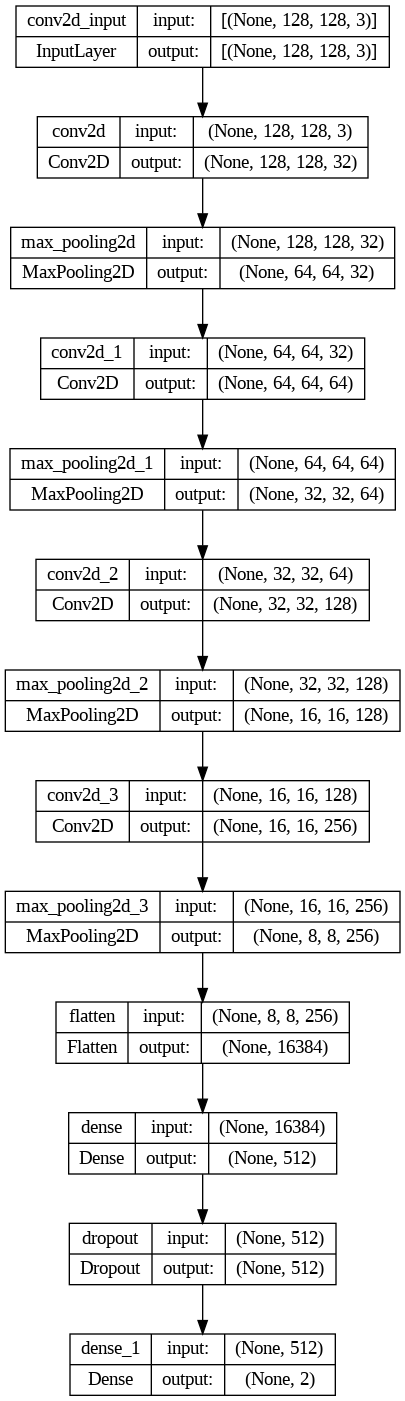

In [ ]:
plot_model(model, to_file='model.png', show_shapes=True)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 32, 32, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 16, 16, 128)       0

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint(filepath='MiniNet_14 Nov.h5',
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             moniter='val_loss'
                            )
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=10,
                              verbose=1
                             )
csv_logger = CSVLogger('training.log')

early_stopping = EarlyStopping(monitor = 'val_acc',
                              min_delta = 0.001,
                              patience =5,
                              verbose = 0,
                              mode = 'auto')

callbacks = [checkpoint, reduce_lr, early_stopping, csv_logger]

In [ ]:
history = model.fit(training_set,
                    validation_data = validation_set,
                    callbacks = callbacks,
                    epochs = 10,
                    validation_steps = 32,
                    verbose=1)

Epoch 1/10
1563/1563 [==============================] - ETA: 0s - loss: 0.6539 - accuracy: 0.6163
Epoch 1: val_loss improved from inf to 0.60413, saving model to MiniNet_14 Nov.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1563/1563 [==============================] - 619s 395ms/step - loss: 0.6539 - accuracy: 0.6163 - val_loss: 0.6041 - val_accuracy: 0.6816 - lr: 0.0010
Epoch 2/10
1563/1563 [==============================] - ETA: 0s - loss: 0.6058 - accuracy: 0.6706
Epoch 2: val_loss improved from 0.60413 to 0.56620, saving model to MiniNet_14 Nov.h5


1563/1563 [==============================] - 579s 370ms/step - loss: 0.6058 - accuracy: 0.6706 - val_loss: 0.5662 - val_accuracy: 0.7051 - lr: 0.0010
Epoch 3/10
1563/1563 [==============================] - ETA: 0s - loss: 0.5592 - accuracy: 0.7144
Epoch 3: val_loss improved from 0.56620 to 0.53231, saving model to MiniNet_14 Nov.h5


1563/1563 [==============================] - 581s 372ms/step - loss: 0.5592 - accuracy: 0.7144 - val_loss: 0.5323 - val_accuracy: 0.7295 - lr: 0.0010
Epoch 4/10
1563/1563 [==============================] - ETA: 0s - loss: 0.5209 - accuracy: 0.7436
Epoch 4: val_loss improved from 0.53231 to 0.45515, saving model to MiniNet_14 Nov.h5


1563/1563 [==============================] - 581s 371ms/step - loss: 0.5209 - accuracy: 0.7436 - val_loss: 0.4551 - val_accuracy: 0.7900 - lr: 0.0010
Epoch 5/10
1563/1563 [==============================] - ETA: 0s - loss: 0.4910 - accuracy: 0.7655
Epoch 5: val_loss improved from 0.45515 to 0.42783, saving model to MiniNet_14 Nov.h5


1563/1563 [==============================] - 595s 381ms/step - loss: 0.4910 - accuracy: 0.7655 - val_loss: 0.4278 - val_accuracy: 0.7988 - lr: 0.0010
Epoch 6/10
1563/1563 [==============================] - ETA: 0s - loss: 0.4654 - accuracy: 0.7816
Epoch 6: val_loss did not improve from 0.42783


1563/1563 [==============================] - 593s 379ms/step - loss: 0.4654 - accuracy: 0.7816 - val_loss: 0.4354 - val_accuracy: 0.8003 - lr: 0.0010
Epoch 7/10
1563/1563 [==============================] - ETA: 0s - loss: 0.4476 - accuracy: 0.7911
Epoch 7: val_loss improved from 0.42783 to 0.40090, saving model to MiniNet_14 Nov.h5


1563/1563 [==============================] - 601s 384ms/step - loss: 0.4476 - accuracy: 0.7911 - val_loss: 0.4009 - val_accuracy: 0.8203 - lr: 0.0010
Epoch 8/10
 193/1563 [==>...........................] - ETA: 8:24 - loss: 0.4363 - accuracy: 0.7966

In [ ]:
history = model.fit(training_set,
                    validation_data = validation_set,
                    callbacks = callbacks,
                    epochs = 10,
                    validation_steps = 100,
                    verbose=1)

Epoch 1/10
1563/1563 [==============================] - ETA: 0s - loss: 0.3236 - accuracy: 0.8621
Epoch 1: val_loss improved from 0.37980 to 0.30703, saving model to MiniNet_14 Nov.h5


1563/1563 [==============================] - 170s 109ms/step - loss: 0.3236 - accuracy: 0.8621 - val_loss: 0.3070 - val_accuracy: 0.8681 - lr: 0.0010
Epoch 2/10
1563/1563 [==============================] - ETA: 0s - loss: 0.2795 - accuracy: 0.8839
Epoch 2: val_loss improved from 0.30703 to 0.28428, saving model to MiniNet_14 Nov.h5


1563/1563 [==============================] - 167s 107ms/step - loss: 0.2795 - accuracy: 0.8839 - val_loss: 0.2843 - val_accuracy: 0.8786 - lr: 0.0010
Epoch 3/10
1563/1563 [==============================] - ETA: 0s - loss: 0.2474 - accuracy: 0.8982
Epoch 3: val_loss improved from 0.28428 to 0.24032, saving model to MiniNet_14 Nov.h5


1563/1563 [==============================] - 169s 108ms/step - loss: 0.2474 - accuracy: 0.8982 - val_loss: 0.2403 - val_accuracy: 0.9009 - lr: 0.0010
Epoch 4/10
1563/1563 [==============================] - ETA: 0s - loss: 0.2231 - accuracy: 0.9097
Epoch 4: val_loss improved from 0.24032 to 0.22493, saving model to MiniNet_14 Nov.h5


1563/1563 [==============================] - 167s 107ms/step - loss: 0.2231 - accuracy: 0.9097 - val_loss: 0.2249 - val_accuracy: 0.9039 - lr: 0.0010
Epoch 5/10
1563/1563 [==============================] - ETA: 0s - loss: 0.1990 - accuracy: 0.9196
Epoch 5: val_loss improved from 0.22493 to 0.21280, saving model to MiniNet_14 Nov.h5


1563/1563 [==============================] - 173s 110ms/step - loss: 0.1990 - accuracy: 0.9196 - val_loss: 0.2128 - val_accuracy: 0.9153 - lr: 0.0010
Epoch 6/10
1563/1563 [==============================] - ETA: 0s - loss: 0.1851 - accuracy: 0.9260
Epoch 6: val_loss did not improve from 0.21280


1563/1563 [==============================] - 167s 107ms/step - loss: 0.1851 - accuracy: 0.9260 - val_loss: 0.2155 - val_accuracy: 0.9148 - lr: 0.0010
Epoch 7/10
1563/1563 [==============================] - ETA: 0s - loss: 0.1733 - accuracy: 0.9328
Epoch 7: val_loss improved from 0.21280 to 0.19777, saving model to MiniNet_14 Nov.h5


1563/1563 [==============================] - 171s 110ms/step - loss: 0.1733 - accuracy: 0.9328 - val_loss: 0.1978 - val_accuracy: 0.9225 - lr: 0.0010
Epoch 8/10
1563/1563 [==============================] - ETA: 0s - loss: 0.1605 - accuracy: 0.9365
Epoch 8: val_loss did not improve from 0.19777


1563/1563 [==============================] - 170s 109ms/step - loss: 0.1605 - accuracy: 0.9365 - val_loss: 0.2157 - val_accuracy: 0.9161 - lr: 0.0010
Epoch 9/10
1563/1563 [==============================] - ETA: 0s - loss: 0.1474 - accuracy: 0.9418
Epoch 9: val_loss did not improve from 0.19777


1563/1563 [==============================] - 169s 108ms/step - loss: 0.1474 - accuracy: 0.9418 - val_loss: 0.2214 - val_accuracy: 0.9139 - lr: 0.0010
Epoch 10/10
1563/1563 [==============================] - ETA: 0s - loss: 0.1406 - accuracy: 0.9446
Epoch 10: val_loss improved from 0.19777 to 0.18089, saving model to MiniNet_14 Nov.h5


1563/1563 [==============================] - 162s 104ms/step - loss: 0.1406 - accuracy: 0.9446 - val_loss: 0.1809 - val_accuracy: 0.9328 - lr: 0.0010


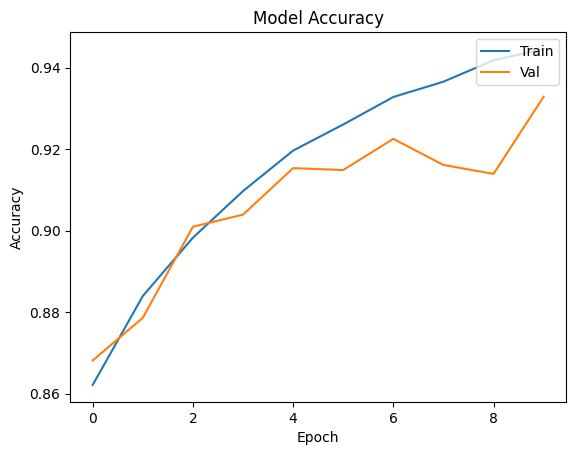

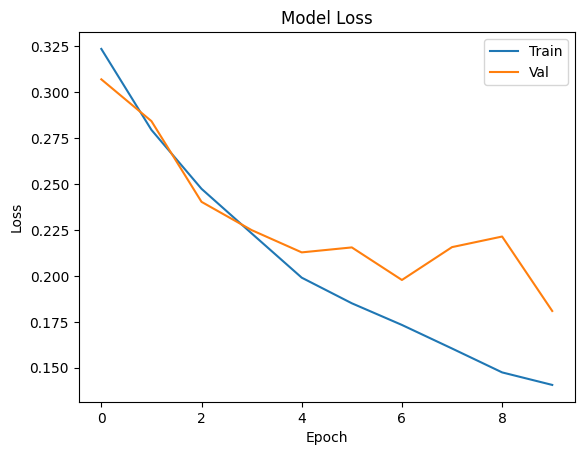

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [ ]:
test_loss, test_acc = model.evaluate(test_set)

313/313 [==============================] - 39s 126ms/step - loss: 0.1872 - accuracy: 0.9303


In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model_new = load_model('/content/MiniNet.h5')

OSError: ignored

In [ ]:
_, accu = model_new.evaluate(test_set)
print('Final Test Acccuracy = {:.3f}'.format(accu*100))

313/313 [==============================] - 27s 85ms/step - loss: 0.1549 - accuracy: 0.9531
Final Test Acccuracy = 95.305


In [ ]:
bs = 512
row, col = 128, 128
train_datagen = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True
                                  )
training_set = train_datagen.flow_from_directory(path + '/train',
                                                 class_mode='binary',
                                                 shuffle=True,
                                                 target_size=(row,col),
                                                 batch_size=bs
                                                )
val_test_datagen = ImageDataGenerator(rescale=1./255)

validation_set = val_test_datagen.flow_from_directory(path + '/valid',
                                                      class_mode='binary',
                                                      shuffle=True,
                                                      target_size=(row,col),
                                                      batch_size=bs
                                                     )
test_set = val_test_datagen.flow_from_directory(path + '/test',
                                                class_mode='binary',
                                                shuffle=True,
                                                target_size=(row,col),
                                                batch_size=bs
                                               )
training_set.class_indices

Found 100000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.
Found 20000 images belonging to 2 classes.


{'fake': 0, 'real': 1}

In [ ]:
model = tf.keras.models.Sequential(
    [
     tf.keras.layers.Conv2D(32, (3,3), padding='same', activation='relu', input_shape = (128, 128, 3)),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Conv2D(64, (3,3), padding='same', activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Conv2D(128, (3,3), padding='same', activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Conv2D(256, (3,3), padding='same', activation='relu'),
     tf.keras.layers.MaxPooling2D(2,2),

     tf.keras.layers.Flatten(),

     tf.keras.layers.Dense(512, activation='relu'),
     tf.keras.layers.Dropout(0.5),

    #  tf.keras.layers.Dropout(0.3),
     tf.keras.layers.Dense(2, activation='softmax')
     ]
)

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint(filepath='MiniNet_2.h5',
                             save_best_only=True,
                             verbose=1,
                             mode='min',
                             moniter='val_loss'
                            )
reduce_lr = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=10,
                              verbose=1
                             )
csv_logger = CSVLogger('training.log')

early_stopping = EarlyStopping(monitor = 'val_acc',
                              min_delta = 0.001,
                              patience =5,
                              verbose = 0,
                              mode = 'auto')

callbacks = [checkpoint, reduce_lr, early_stopping, csv_logger]

In [ ]:
history = model.fit(training_set,
                    validation_data = validation_set,
                    callbacks = callbacks,
                    epochs = 10,
                    validation_steps = 100,
                    verbose=1)

Epoch 1/10
196/196 [==============================] - ETA: 0s - loss: 0.6345 - accuracy: 0.6240


Epoch 1: val_loss improved from inf to 0.53715, saving model to MiniNet_2.h5


196/196 [==============================] - 201s 987ms/step - loss: 0.6345 - accuracy: 0.6240 - val_loss: 0.5371 - val_accuracy: 0.7322 - lr: 0.0010
Epoch 2/10
196/196 [==============================] - ETA: 0s - loss: 0.4703 - accuracy: 0.7766

196/196 [==============================] - 166s 843ms/step - loss: 0.4703 - accuracy: 0.7766 - lr: 0.0010
Epoch 3/10
196/196 [==============================] - ETA: 0s - loss: 0.3768 - accuracy: 0.8320

196/196 [==============================] - 167s 852ms/step - loss: 0.3768 - accuracy: 0.8320 - lr: 0.0010
Epoch 4/10
196/196 [==============================] - ETA: 0s - loss: 0.3199 - accuracy: 0.8633

196/196 [==============================] - 170s 864ms/step - loss: 0.3199 - accuracy: 0.8633 - lr: 0.0010
Epoch 5/10
196/196 [==============================] - ETA: 0s - loss: 0.2673 - accuracy: 0.8882

196/196 [==============================] - 170s 872ms/step - loss: 0.2673 - accuracy: 0.8882 - lr: 0.0010
Epoch 6/10
196/196 [==============================] - ETA: 0s - loss: 0.2320 - accuracy: 0.9051

196/196 [==============================] - 174s 885ms/step - loss: 0.2320 - accuracy: 0.9051 - lr: 0.0010
Epoch 7/10
196/196 [==============================] - ETA: 0s - loss: 0.2018 - accuracy: 0.9184

196/196 [==============================] - 166s 848ms/step - loss: 0.2018 - accuracy: 0.9184 - lr: 0.0010
Epoch 8/10
196/196 [==============================] - ETA: 0s - loss: 0.1774 - accuracy: 0.9298

196/196 [==============================] - 166s 845ms/step - loss: 0.1774 - accuracy: 0.9298 - lr: 0.0010
Epoch 9/10
196/196 [==============================] - ETA: 0s - loss: 0.1615 - accuracy: 0.9360

196/196 [==============================] - 164s 839ms/step - loss: 0.1615 - accuracy: 0.9360 - lr: 0.0010
Epoch 10/10
196/196 [==============================] - ETA: 0s - loss: 0.1471 - accuracy: 0.9428

196/196 [==============================] - 165s 841ms/step - loss: 0.1471 - accuracy: 0.9428 - lr: 0.0010


In [ ]:
test_loss, test_acc = model.evaluate(test_set)

40/40 [==============================] - 30s 760ms/step - loss: 0.1590 - accuracy: 0.9381


In [ ]:
_, accu = model.evaluate(test_set)
print('Final Test Acccuracy = {:.3f}'.format(accu*100))

40/40 [==============================] - 42s 1s/step - loss: 0.1521 - accuracy: 0.9379
Final Test Acccuracy = 93.790


In [ ]:
import cv2

In [ ]:
filtered_train_set = '/content/drive/MyDrive/Filtered_images_3x3 avg blur'
os.makedirs(filtered_train_set, exist_ok=True)

def apply_average_filter(image_path):
    # Read the image
    img = cv2.imread(image_path)

    # Apply average filtering with a 3x3 kernel
    filtered_img = cv2.blur(img, (3, 3))

    # Save the filtered image
    filtered_image_path = os.path.join(filtered_train_set, os.path.basename(image_path))
    cv2.imwrite(filtered_image_path, filtered_img)



In [ ]:
for filename in os.listdir('training_set'):
    if filename.endswith(".jpg") or filename.endswith(".png"):  # Adjust file extensions as needed
        image_path = os.path.join('/content/140k-real-and-fake-faces/real_vs_fake/real-vs-fake/train', filename)
        apply_average_filter(image_path)

print("Average filtering applied to all images.")


Average filtering applied to all images.


In [ ]:
import cv2
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set parameters for data generators
bs = 64
row, col = 128, 128

# Create a custom data generator with average filtering
class FilteredImageDataGenerator(ImageDataGenerator):
    def __init__(self, *args, **kwargs):
        super(FilteredImageDataGenerator, self).__init__(*args, **kwargs)

    def apply_average_filter(self, image):
        return cv2.blur(image, (3, 3))  # You can adjust the kernel size if needed

    def flow_from_directory_with_filtering(self, directory, *args, **kwargs):
        generator = super(FilteredImageDataGenerator, self).flow_from_directory(directory, *args, **kwargs)

        for batch_x, batch_y in generator:
            filtered_batch_x = np.array([self.apply_average_filter(image) for image in batch_x])
            yield filtered_batch_x, batch_y

# Create data generators with filtering
train_datagen = FilteredImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True
)

training_set = train_datagen.flow_from_directory_with_filtering(
    os.path.join(path, 'train'),
    class_mode='binary',
    shuffle=True,
    target_size=(row, col),
    batch_size=bs
)

# Validation and test sets without filtering
val_test_datagen = ImageDataGenerator(rescale=1./255)

validation_set = val_test_datagen.flow_from_directory(
    os.path.join(path, 'valid'),
    class_mode='binary',
    shuffle=True,
    target_size=(row, col),
    batch_size=bs
)

test_set = val_test_datagen.flow_from_directory(
    os.path.join(path, 'test'),
    class_mode='binary',
    shuffle=True,
    target_size=(row, col),
    batch_size=bs
)

# Check class indices
print(training_set.class_indices)